In [24]:
import pandas as pd
import numpy as np
import dateutil
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [25]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
#Aesthetics
sns.set_style("darkgrid")
%matplotlib inline

In [26]:
tel=pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\Telecom_analysis\data\Week1_challenge_data_source(CSV).csv')
tel.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,NaN,NaN,44.00,44.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,NaN,NaN,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","

In [27]:
#convert date time from string
tel['Start'] = pd.to_datetime(tel['Start'])
tel['End'] = pd.to_datetime(tel['End'])

In [28]:
print(f" There are {tel.shape[0]} rows and {tel.shape[1]} columns")

 There are 150001 rows and 55 columns


In [29]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(tel)

The telecom dataset contains 12.5 % missing values.


In [30]:
# drop columns with more than 30% missing values
NA_val = tel.isna().sum()
def na_filter(na, threshold = .3): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/tel.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
tel = tel[na_filter(NA_val)]


top 10 handsets used by the customers.

In [31]:
hand=tel['Handset Type'].value_counts()[:10]
hand

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:>

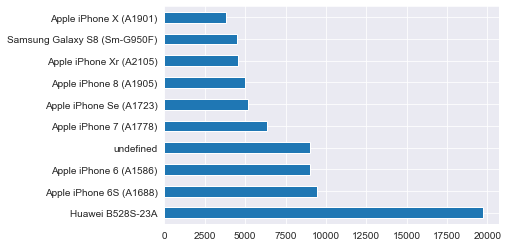

In [32]:
tel['Handset Type'].value_counts()[:10].plot(kind='barh')

In [33]:
tel['Handset Manufacturer'].value_counts()[:5]

Apple                            59565
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: Handset Manufacturer, dtype: int64

<AxesSubplot:>

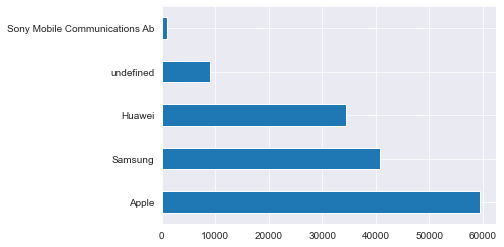

In [34]:
tel['Handset Manufacturer'].value_counts()[:5].plot(kind='barh')

In [35]:
Data = ['Apple','Samsung','Huawei']
top3 = tel.loc[tel['Handset Manufacturer'].isin(Data)]
top3

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:00,770.00,2019-04-25 14:35:00,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:00,235.00,2019-04-25 08:15:00,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:00,1.00,2019-04-25 11:58:00,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,NaN,NaN,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:00,565.00,2019-04-25 10:40:00,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,NaN,NaN,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
6,"13,114,483,501,243,799,552.00",2019-04-13 08:41:00,612.00,2019-04-25 08:16:00,168.00,"1,035,261.00","208,201,448,341,047.00","33,665,368,271.00","86,762,704,322,800.00",9.16456701058919E+015,102.00,5.00,22.00,38.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"9,785.00","316,210.00","1,035,261,556.00",Huawei,Huawei Mate 20 Lite,33.00,655.00,"1,623,509.00","1,482.00","1,837,897.00","3,068,975.00","1,838,947.00","252,032.00","7,234,465.00","1,886,295.00","13,231,006.00","17,981,760.00","44,796,223.00","14,084,934.00","803,653,557.00","10,649,768.00","47,925,246.00","70,562,047.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149994,"13,114,483,573,367,199,744.00",2019-04-29 07:28:00,83.00,2019-04-30 15:01:00,268.00,"113,545.00","208,20

In [36]:
top = top3.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().groupby(level=0).head(5)
top

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

In [37]:
def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

In [38]:
number_of_xDRsessions =find_agg(tel,'MSISDN/Number','count','number of xDR sessions per user',10)
number_of_xDRsessions

,MSISDN/Number,number of xDR sessions per user
13526,"33,626,320,676.00",18
13180,"33,625,779,332.00",17
6437,"33,614,892,860.00",17
37052,"33,659,725,664.00",16
92923,"33,760,536,639.00",15
76363,"33,675,877,202.00",15
65118,"33,667,163,239.00",13
13994,"33,627,080,969.00",12
1279,"33,604,515,716.00",12
92577,"33,760,413,819.00",12


In [39]:
sssiond=tel.groupby('MSISDN/Number', as_index=False).agg({"Dur. (ms).1": "sum"}).sort_values('Dur. (ms).1', ascending= False)[:10]
sssiond

,MSISDN/Number,Dur. (ms).1
13180,"33,625,779,332.00","18,553,763,486.00"
6437,"33,614,892,860.00","9,966,905,758.00"
92923,"33,760,536,639.00","9,279,442,000.00"
13526,"33,626,320,676.00","8,791,936,680.00"
65118,"33,667,163,239.00","8,744,922,020.00"
50281,"33,662,840,755.00","6,614,274,287.00"
57160,"33,664,693,736.00","6,288,735,771.00"
666,"33,603,127,838.00","6,287,767,483.00"
66029,"33,667,456,716.00","5,649,885,358.00"
92577,"33,760,413,819.00","5,321,673,794.00"


In [40]:
def format_float(value):
    return f'{value:,.2f}'
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]


pd.options.display.float_format = format_float

In [41]:
def total_column(col_1,col_2):
    new_col = col_1+col_2
    return new_col

In [42]:
tel['Social_media_total']= total_column(tel['Social Media DL (Bytes)'],tel['Social Media UL (Bytes)'])
tel['Google_total']= total_column(tel['Google DL (Bytes)'],tel['Google UL (Bytes)'])
tel['Email_total']= total_column(tel['Email DL (Bytes)'],tel['Email UL (Bytes)'])
tel['Youtube_total']= total_column(tel['Youtube DL (Bytes)'],tel['Youtube UL (Bytes)'])
tel['Netflix_total']= total_column(tel['Netflix DL (Bytes)'],tel['Netflix UL (Bytes)'])
tel['Gaming_total']= total_column(tel['Gaming DL (Bytes)'],tel['Gaming UL (Bytes)'])
tel['Other_total']= total_column(tel['Other DL (Bytes)'],tel['Other UL (Bytes)'])
tel['total']= total_column(tel['Total DL (Bytes)'],tel['Total UL (Bytes)'])

In [43]:
tel['Social_media_total']=convert_bytes_to_megabytes(tel,'Social_media_total')
tel['Google_total']=convert_bytes_to_megabytes(tel,'Google_total')
tel['Email_total']=convert_bytes_to_megabytes(tel,'Email_total')
tel['Youtube_total']=convert_bytes_to_megabytes(tel,'Youtube_total')
tel['Netflix_total']=convert_bytes_to_megabytes(tel,'Netflix_total')
tel['Gaming_total']=convert_bytes_to_megabytes(tel,'Gaming_total')
tel['Other_total']=convert_bytes_to_megabytes(tel,'Other_total')
tel['total']=convert_bytes_to_megabytes(tel,'total')

In [44]:
tel.groupby('MSISDN/Number',as_index=False).agg({'total':'sum'}).sort_values('total', ascending= False)[:10]

,MSISDN/Number,total
6437,"33,614,892,860.00","8,846.23"
92923,"33,760,536,639.00","8,514.77"
13180,"33,625,779,332.00","8,499.62"
13526,"33,626,320,676.00","7,971.17"
76363,"33,675,877,202.00","7,891.11"
37052,"33,659,725,664.00","7,705.86"
63028,"33,666,464,084.00","7,308.50"
92577,"33,760,413,819.00","7,132.37"
57241,"33,664,712,899.00","6,872.02"
86455,"33,698,792,269.00","6,540.90"


In [45]:
sssiond=tel.groupby('MSISDN/Number', as_index=False).agg({"Dur. (ms).1": "sum"}).sort_values('Dur. (ms).1', ascending= False)[:10]
sssiond

,MSISDN/Number,Dur. (ms).1
13180,"33,625,779,332.00","18,553,763,486.00"
6437,"33,614,892,860.00","9,966,905,758.00"
92923,"33,760,536,639.00","9,279,442,000.00"
13526,"33,626,320,676.00","8,791,936,680.00"
65118,"33,667,163,239.00","8,744,922,020.00"
50281,"33,662,840,755.00","6,614,274,287.00"
57160,"33,664,693,736.00","6,288,735,771.00"
666,"33,603,127,838.00","6,287,767,483.00"
66029,"33,667,456,716.00","5,649,885,358.00"
92577,"33,760,413,819.00","5,321,673,794.00"


In [46]:
tel.groupby(
   ['MSISDN/Number']
).agg(
    {
         'Social_media_total':sum,
         'Google_total':sum,
         'Email_total':sum,
         'Youtube_total':sum,
         'Netflix_total':sum,
         'Gaming_total':sum,
         'Other_total':sum,      
    }
)

,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total
MSISDN/Number,,,,,,,
"33,601,001,722.00",2.23,4.39,1.33,21.62,27.18,812.46,386.57
"33,601,001,754.00",2.66,5.33,3.31,12.43,11.22,119.75,281.71
"33,601,002,511.00",3.20,3.44,3.21,21.33,19.35,538.83,501.69
"33,601,007,832.00",0.28,9.68,2.28,6.98,1.94,391.13,35.28
"33,601,008,617.00",2.91,18.50,3.31,41.53,49.20,"1,314.80",804.80
...,...,...,...,...,...,...,...
"33,789,996,170.00",0.30,7.53,1.01,26.65,14.90,660.36,295.28
"33,789,997,247.00",0.50,5.43,2.51,19.85,8.53,437.00,211.12
"3,197,020,876,596.00",0.72,10.44,1.52,11.96,26.59,178.05,470.53



Task 1.2 -

Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column. You’re expected to report about the following using python script and slide :

1.Describe all relevant variables and associated data types (slide).

2.Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

3.Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

4.Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

5.Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

6.Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

7.Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

8.Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum).

In [47]:
tel['Bearer Id'] = tel['Bearer Id'].fillna(tel['Bearer Id'].mode()[0])
tel['IMSI'] = tel['IMSI'].fillna(tel['IMSI'].mode()[0])
tel['MSISDN/Number'] = tel['MSISDN/Number'].fillna(tel['MSISDN/Number'].mode()[0])
tel['IMEI'] = tel['IMEI'].fillna(tel['IMEI'].mode()[0])

In [48]:
def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

In [49]:

tel['Handset Manufacturer'] = fix_missing_bfill(tel, 'Handset Manufacturer')
tel['Handset Type'] = fix_missing_bfill(tel, 'Handset Type')
tel['Last Location Name'] = fix_missing_bfill(tel, 'Last Location Name')

In [50]:
tel=tel.drop(['Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'],axis=1, inplace = False)

In [51]:
tel = tel.dropna()

In [52]:
qual = ['Dur. (ms).1','Social_media_total','Google_total','Email_total','Youtube_total','Netflix_total','Gaming_total','Other_total','total']

In [53]:
tel_qual = tel[qual]
tel_qual.head()

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
0,"1,823,652,892.00",1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,"1,365,104,371.00",1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,"1,361,762,651.00",1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,"1,321,509,685.00",0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,"1,089,009,389.00",0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68


In [54]:

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

In [55]:
tel_qual['Dur. (ms).1'] =fix_outlier(tel_qual,'Dur. (ms).1')
tel_qual['Social_media_total']=fix_outlier(tel_qual,'Social_media_total')
tel_qual['Google_total']=fix_outlier(tel_qual,'Google_total')
tel_qual['Email_total']=fix_outlier(tel_qual,'Email_total')
tel_qual['Youtube_total']=fix_outlier(tel_qual,'Youtube_total')
tel_qual['Netflix_total']=fix_outlier(tel_qual,'Netflix_total')
tel_qual['Gaming_total']=fix_outlier(tel_qual,'Gaming_total')
tel_qual['Other_total']=fix_outlier(tel_qual,'Other_total')
tel_qual['total']=fix_outlier(tel_qual,'total')

In [56]:
tel_qual.describe()

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
count,"150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00","150,000.00"
mean,"91,650,474.17",1.74,7.49,2.17,21.75,21.74,410.36,409.33,475.65
std,"48,802,507.21",0.96,3.20,0.98,8.29,8.30,226.07,225.21,226.21
min,"7,142,988.00",0.00,0.04,0.01,0.08,0.10,0.31,0.15,28.96
25%,"57,440,785.25",0.93,4.94,1.36,16.00,15.98,218.73,218.55,284.48
50%,"86,399,983.00",1.83,7.81,2.26,22.66,22.64,431.62,429.99,496.86
75%,"115,970,139.25",2.55,10.12,2.98,27.78,27.75,599.07,597.20,664.22
max,"241,538,150.00",3.44,13.40,3.94,38.10,38.09,809.87,808.95,875.31


In [57]:
Social = ['Social_media_total','Google_total','Email_total','Youtube_total','Netflix_total','Gaming_total','Other_total','total']

In [58]:
social = tel[Social]
social.head()

,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
0,1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68


In [59]:

#Central tendency calculations
print('MEAN: \n',tel_qual.mean())
print('\r \n')
print('MEDIAN: \n',tel_qual.median())
print('\r \n')
print('MODE: \n',tel_qual.mode())
print('\r \n')
print('Q1-Quartile 1: \n',tel_qual.quantile(q=(0.25,0.50,0.75)))

MEAN: 
 Dur. (ms).1          91,650,474.17
Social_media_total            1.74
Google_total                  7.49
Email_total                   2.17
Youtube_total                21.75
Netflix_total                21.74
Gaming_total                410.36
Other_total                 409.33
total                       475.65
dtype: float64
 

MEDIAN: 
 Dur. (ms).1          86,399,983.00
Social_media_total            1.83
Google_total                  7.81
Email_total                   2.26
Youtube_total                22.66
Netflix_total                22.64
Gaming_total                431.62
Other_total                 429.99
total                       496.86
dtype: float64
 

MODE: 
     Dur. (ms).1  Social_media_total  Google_total  Email_total  Youtube_total  \
0 86,399,983.00                1.83          7.81         2.26          22.66   

   Netflix_total  Gaming_total  Other_total  total  
0          22.64        431.62       429.99 496.86  
 

Q1-Quartile 1: 
         Dur. (ms).1

In [60]:
def plot_univariate(df,col1,col2):
    plt.figure(figsize = (12,8))
    
    plt.subplot(2,2,1)
    plt.hist(df[col1],bins=20,color = 'blue', edgecolor='black',linewidth =0.5)
    plt.title(f'Histogram of {col1}', size = 14)
    
    plt.subplot(2,2,2)
    plt.boxplot(df[col1])
    plt.title(f'Boxplot of {col1}',size = 14)
    
    plt.subplot(2,2,3)
    plt.hist(df[col2],bins=20,color = 'blue', edgecolor='black',linewidth =0.5)
    plt.title(f'Histogram of {col2}', size = 14)
    
    plt.subplot(2,2,4)
    plt.boxplot(df[col2])
    plt.title(f'Boxplot of {col2}',size = 14)
    
    plt.show()

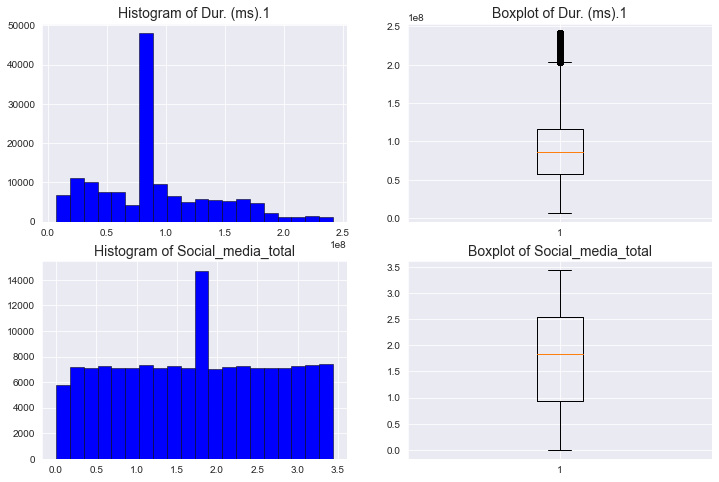

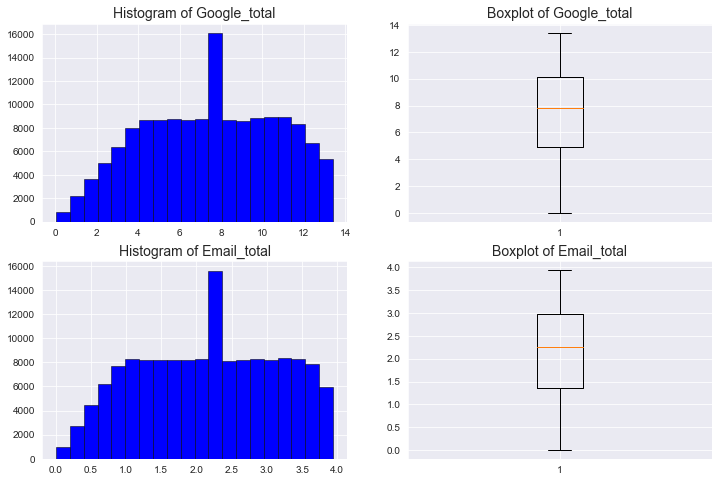

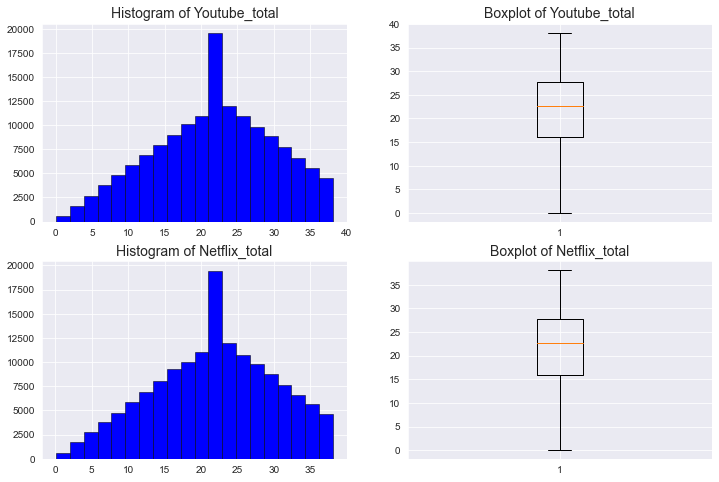

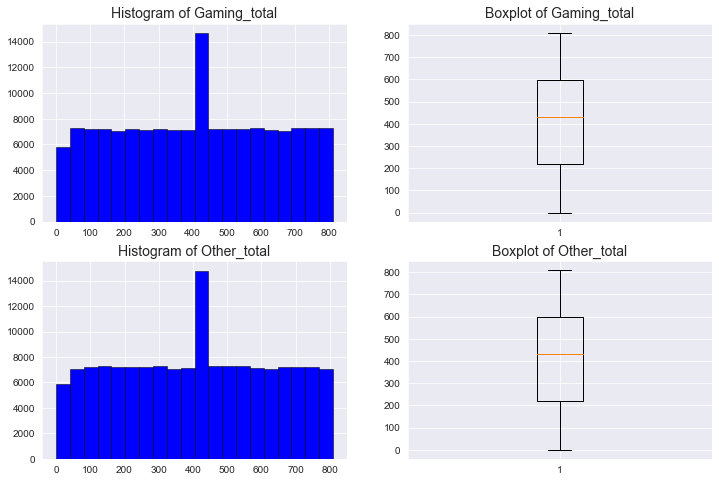

In [61]:
plot_univariate(tel_qual,'Dur. (ms).1','Social_media_total')
plot_univariate(tel_qual,'Google_total','Email_total')
plot_univariate(tel_qual,'Youtube_total','Netflix_total')
plot_univariate(tel_qual,'Gaming_total','Other_total')

In [62]:

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

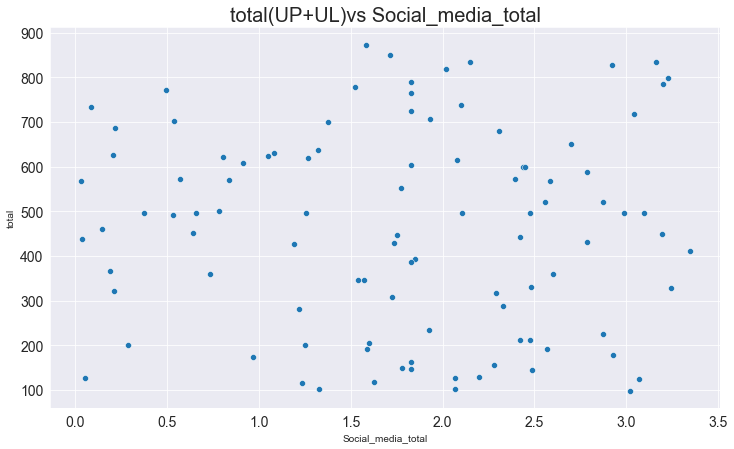

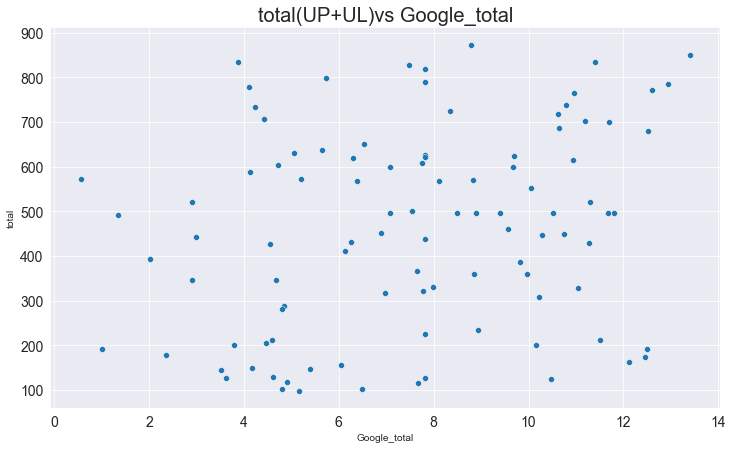

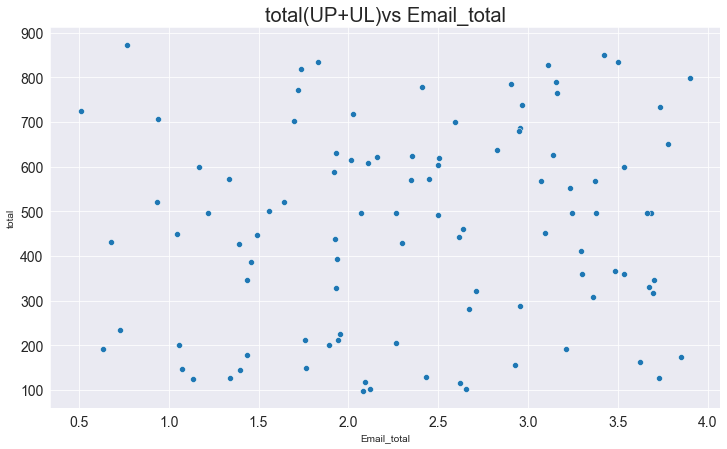

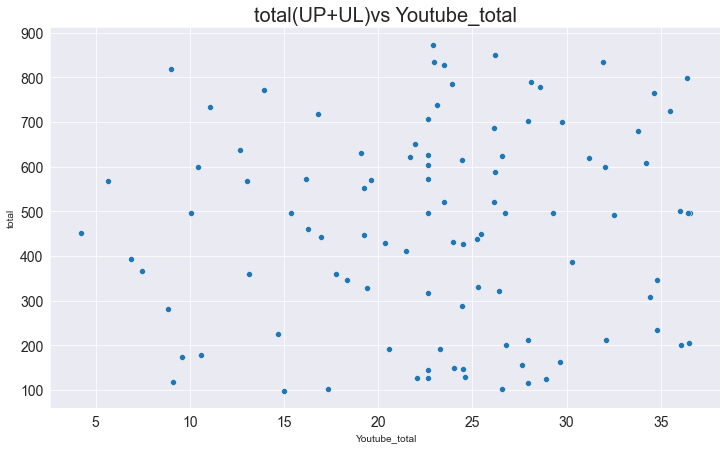

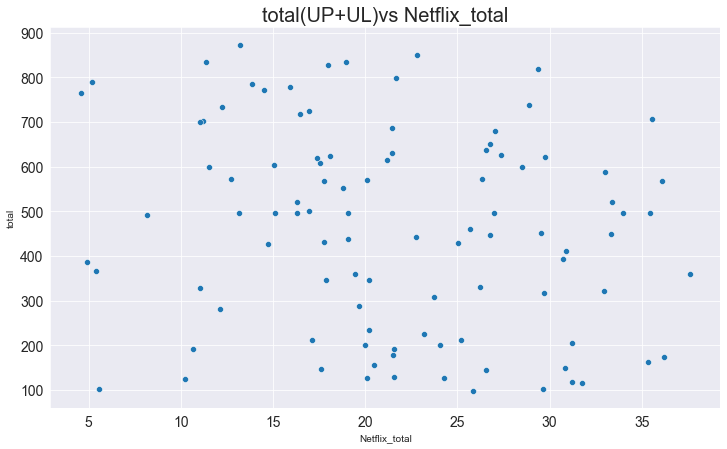

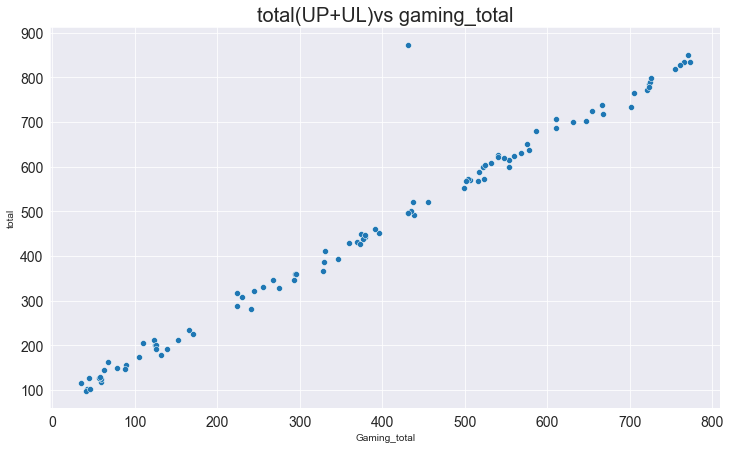

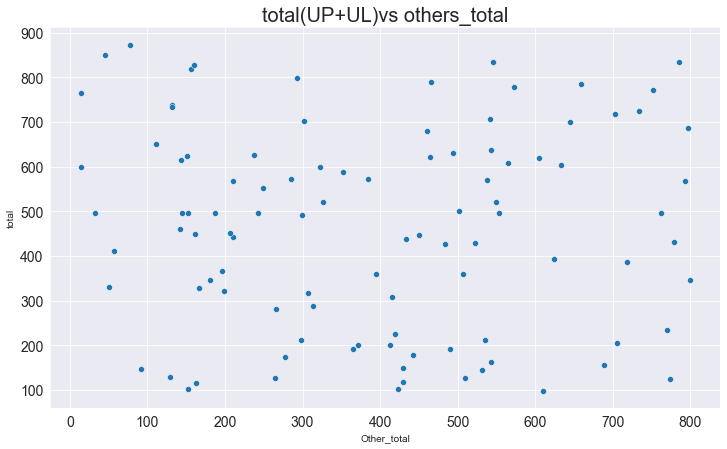

In [63]:

plot_scatter(tel_qual.head(100), x_col="Social_media_total", y_col="total",title="total(UP+UL)vs Social_media_total")
plot_scatter(tel_qual.head(100), x_col="Google_total", y_col="total",title="total(UP+UL)vs Google_total")
plot_scatter(tel_qual.head(100), x_col="Email_total", y_col="total",title="total(UP+UL)vs Email_total")
plot_scatter(tel_qual.head(100), x_col="Youtube_total", y_col="total",title="total(UP+UL)vs Youtube_total")
plot_scatter(tel_qual.head(100), x_col="Netflix_total", y_col="total",title="total(UP+UL)vs Netflix_total")
plot_scatter(tel_qual.head(100), x_col="Gaming_total", y_col="total",title="total(UP+UL)vs gaming_total")
plot_scatter(tel_qual.head(100), x_col="Other_total", y_col="total",title="total(UP+UL)vs others_total")

In [64]:
tel_qual['DecileRank'] = pd.qcut(tel_qual['total'], q = 10, labels = False)

<AxesSubplot:>

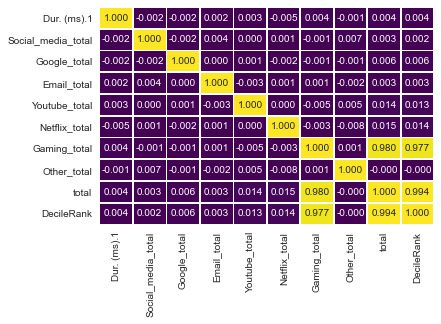

In [65]:
corr = tel_qual.corr()
sns.heatmap(corr, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.3f', linewidths=.7, cbar=False )